# **<h1><center>DIP ASSIGNMENT 3</center></h1>**

# **(1) Radial Sinusoid and its Frequency Response**

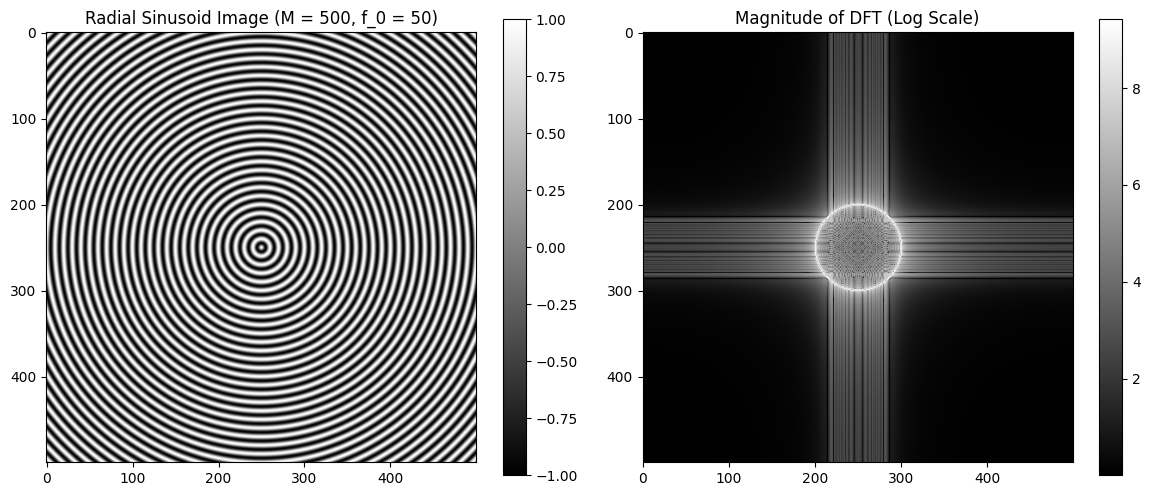

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 500
f_0 = 50 # radius

# Generate radial sinusoid image
u = np.arange(M)
v = np.arange(M)
U, V = np.meshgrid(u, v)
D = np.sqrt((U - M/2)**2 + (V - M/2)**2)
x = np.cos((2*np.pi*f_0/M) * D)

# Compute the 2D-DFT of this image
X = np.fft.fft2(x)   # matrix X : high freq at center and low freq and corner 

# Cyclically shift DFT to center using fftshift
# if you multiply x by (−1)**(x+y)before computing the DFT,
# the zero frequency will already be at the center of X, and you won't need to use np.fft.fftshift()
X_shifted = np.fft.fftshift(X)  # after shift,  # low freq at center and high freq and corner (better visualization)

# Visualize the magnitude of DFT
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(x, cmap='gray')
plt.title('Radial Sinusoid Image (M = 500, f_0 = 50)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(X_shifted)), cmap='gray')

plt.title('Magnitude of DFT (Log Scale)')
plt.colorbar()

plt.tight_layout()

# # Save the image
save_path = "output/Q1_1.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


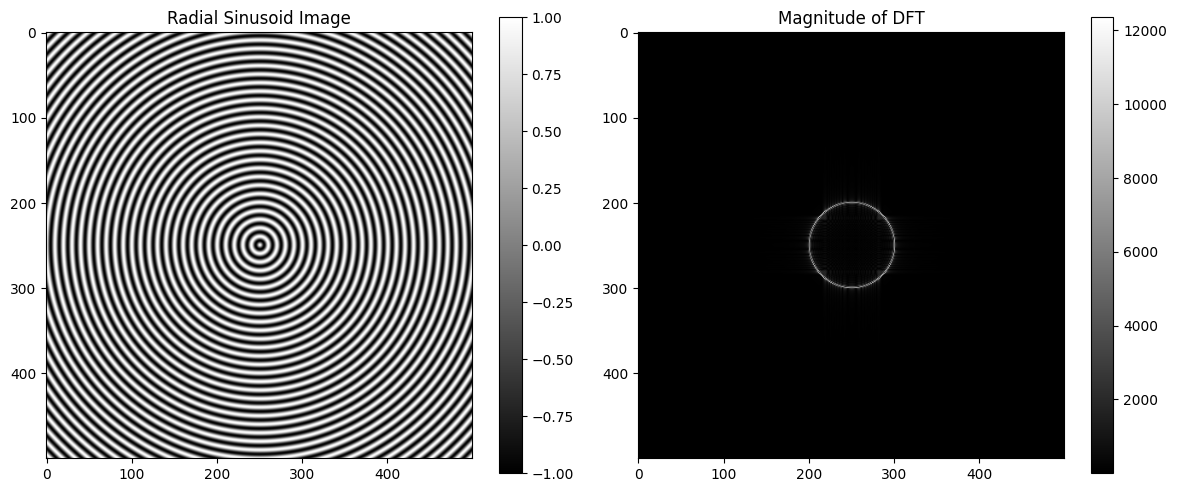

In [2]:
# Visualizing DFT magnitude without log scale


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(x, cmap='gray')
plt.title('Radial Sinusoid Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(np.abs(X_shifted), cmap='gray')
plt.title('Magnitude of DFT')
plt.colorbar()

plt.tight_layout()
plt.show()


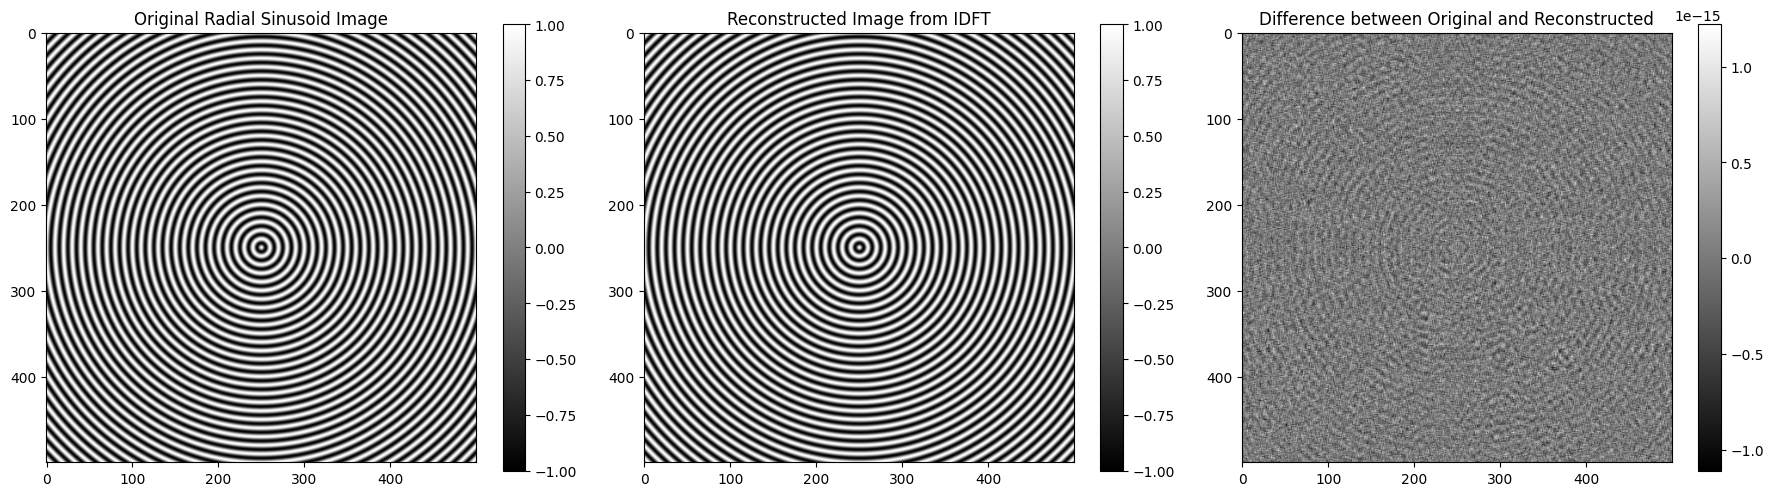

Maximum difference between original and reconstructed image: 1.2212453270876722e-15


In [3]:



# Compute IDFT of the DFT response
x_reconstructed = np.fft.ifft2(X)

# Visualize the original, reconstructed, and difference images
plt.figure(figsize=(18, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(x, cmap='gray')
plt.title('Original Radial Sinusoid Image')
plt.colorbar()

# Reconstructed Image
plt.subplot(1, 3, 2)
plt.imshow(np.real(x_reconstructed), cmap='gray')
plt.title('Reconstructed Image from IDFT')
plt.colorbar()

# Difference between original and reconstructed image
difference = (x - np.real(x_reconstructed))
#difference = x - reconstructed.real

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference between Original and Reconstructed')
plt.colorbar()

plt.tight_layout()

# Save the image 
save_path = "output/Q1_2.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()

# Compute maximum difference between original and reconstructed image
difference_max = np.max(difference)
print(f'Maximum difference between original and reconstructed image: {difference_max}')


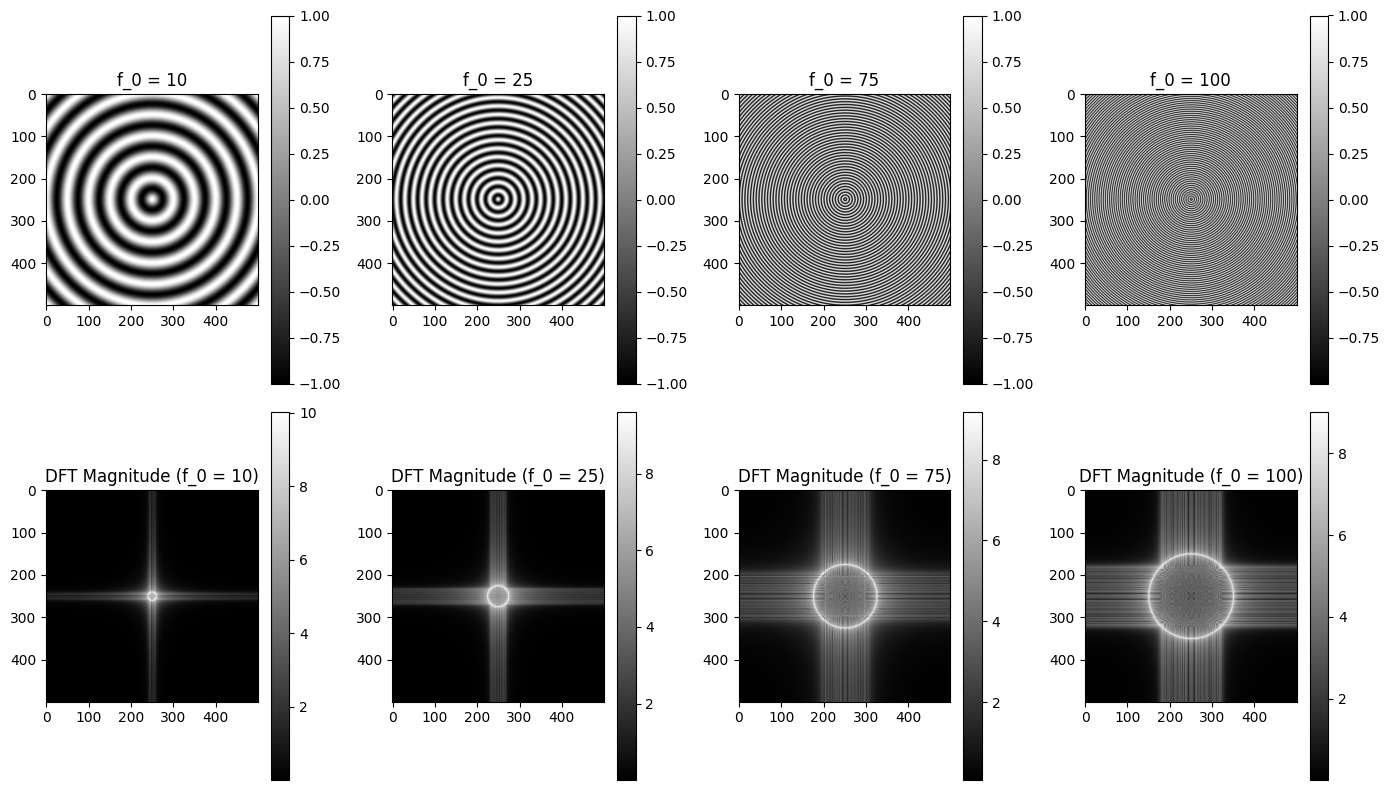

In [4]:
# Change frequency f_0
frequencies = [10, 25, 75, 100]
images = []
dft_magnitudes = []

for f in frequencies:
    # Generate radial sinusoid image for the given frequency
    x_freq = np.cos((2*np.pi*f/M) * D)
    images.append(x_freq)
    
    # Compute DFT and shift it to the center
    X_freq = np.fft.fftshift(np.fft.fft2(x_freq))
    dft_magnitudes.append(X_freq)

# Visualize the radial sinusoid images and their DFT magnitudes for different frequencies
plt.figure(figsize=(14, 8))
for i, f in enumerate(frequencies):
    plt.subplot(2, len(frequencies), i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'f_0 = {f}')
    plt.colorbar()
    
    plt.subplot(2, len(frequencies), i + 1 + len(frequencies))
    plt.imshow(np.log(1 + np.abs(dft_magnitudes[i])), cmap='gray')   # with log scale
    #plt.imshow(np.abs(dft_magnitudes[i]), cmap='gray') # without log scale
    plt.title(f'DFT Magnitude (f_0 = {f})')
    plt.colorbar()

plt.tight_layout()
# Save the image as 
save_path = "output/Q1_3.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


## **(2) Frequency Domain Filtering**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread("files/characters.tif", cv2.IMREAD_GRAYSCALE)

# Normalize the image to [0, 1]
normalized_image = image / 255.0

# Center the image for DFT
rows, cols = normalized_image.shape
centered_image = np.array([[normalized_image[x, y] * (-1)**(x + y) for y in range(cols)] for x in range(rows)]) # multiplying pixel intensities by (−1)^(x+y) 

# Compute the centered DFT of the image
dft_centered = np.fft.fft2(centered_image)


#  computes the logarithm of the magnitude spectrum wihtout shifting the zero-frequency component to the center
log_magnitude_spectrum = np.log(1 + np.abs(dft_centered))



# Display the magnitude spectrum of the DFT for visualization purposes
# magnitude_spectrum_centered = np.fft.fftshift(np.abs(dft_centered))
# log_magnitude_spectrum = np.log(1 + magnitude_spectrum_centered)








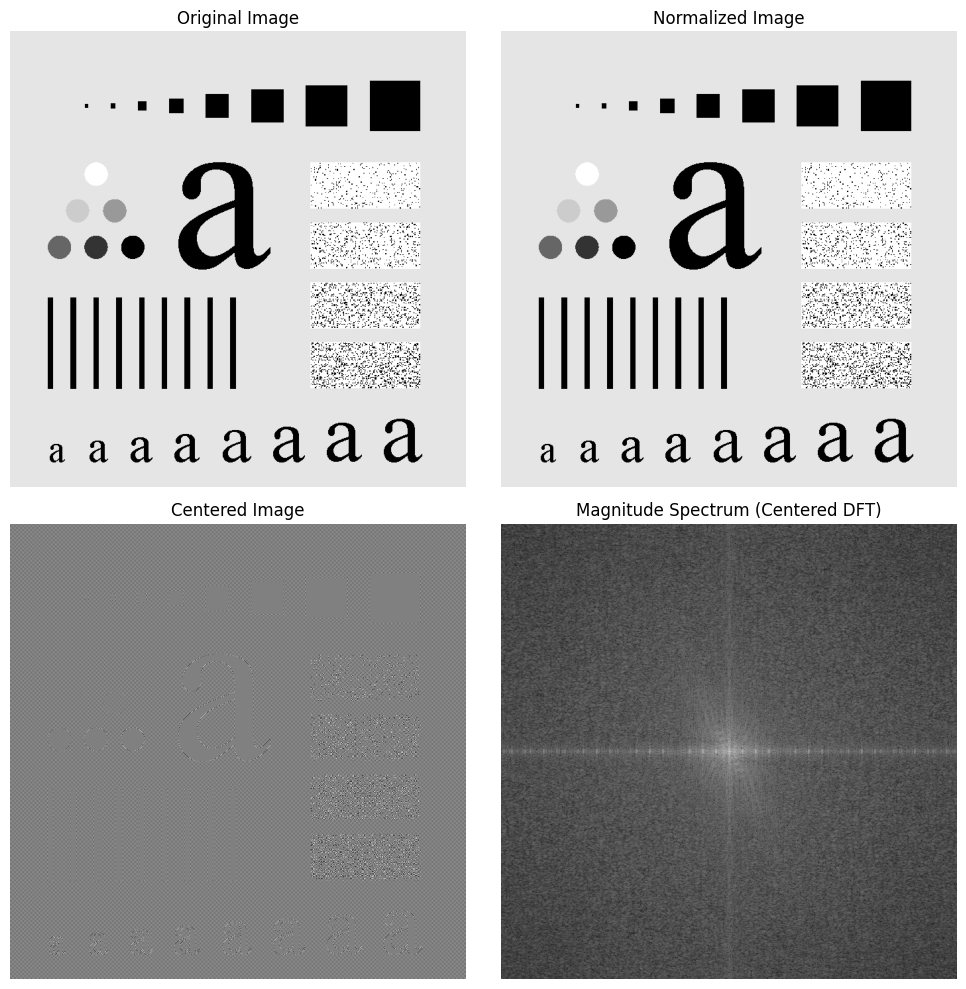

In [6]:
# Display the images in a grid format for comparison

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original Image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Normalized Image
axs[0, 1].imshow(normalized_image, cmap='gray')
axs[0, 1].set_title("Normalized Image")
axs[0, 1].axis('off')

# Centered Image
axs[1, 0].imshow(centered_image, cmap='gray')
axs[1, 0].set_title("Centered Image")
axs[1, 0].axis('off')

# Magnitude Spectrum (Centered DFT)
axs[1, 1].imshow((log_magnitude_spectrum), cmap='gray')
axs[1, 1].set_title("Magnitude Spectrum (Centered DFT)")
axs[1, 1].axis('off')

plt.tight_layout()

# Save the image 
save_path = "output/Q2_1.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()


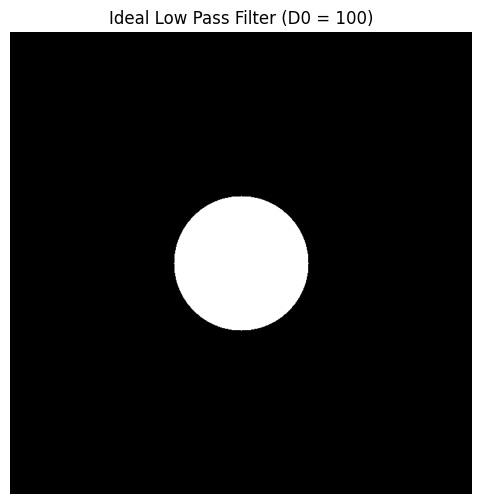

In [7]:
def ideal_low_pass_filter(P, Q, D0):
    """
    Generate an Ideal Low Pass Filter (ILPF)
    
    Parameters:
    - P: number of rows in the filter (same as image)
    - Q: number of columns in the filter (same as image)
    - D0: cutoff frequency
    
    Returns:
    - ILPF filter of size (P, Q)
    """
    center_x, center_y = P // 2, Q // 2
    ilpf = np.zeros((P, Q))
    
    for x in range(P):
        for y in range(Q):
            distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            if distance <= D0:
                ilpf[x, y] = 1
    
    return ilpf

# Define the cutoff frequency D0
D0 = 100

# Generate the ILPF
ilpf = ideal_low_pass_filter(rows, cols, D0)

# Display the ILPF
plt.figure(figsize=(6, 6))
plt.imshow(ilpf, cmap='gray')
plt.title(f"Ideal Low Pass Filter (D0 = {D0})")
plt.axis('off')

# Save the image 
save_path = "output/Q2_2.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()


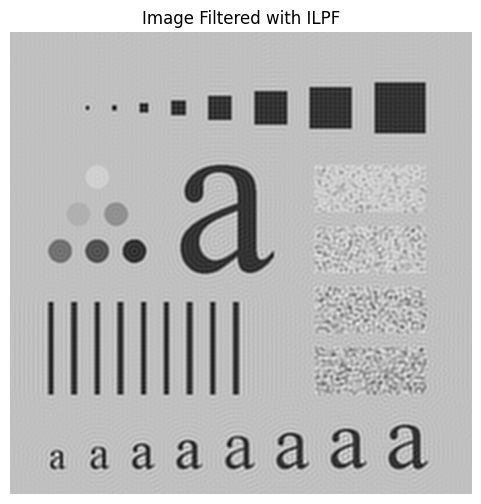

In [8]:
# Filter the image in the frequency domain using the ILPF
filtered_dft = dft_centered * ilpf  # element-wise multiplicatio

# Compute the inverse DFT of the filtered image
ilpf_filtered_image = np.fft.ifft2(filtered_dft).real

# Compensate for the centered DFT
ilpf_filtered_image = np.array([[ilpf_filtered_image[x, y] * (-1)**(x + y) for y in range(cols)] for x in range(rows)])

# Display the filtered image
plt.figure(figsize=(6, 6))
plt.imshow(ilpf_filtered_image, cmap='gray')
plt.title("Image Filtered with ILPF")
plt.axis('off')

# Save the image 
save_path = "output/Q2_3.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


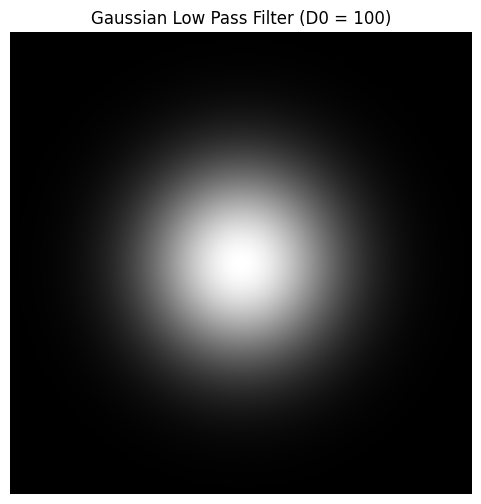

In [9]:
def gaussian_low_pass_filter(P, Q, D0):
    """
    Generate a Gaussian Low Pass Filter (GLPF)
    
    Parameters:
    - P: number of rows in the filter (same as image)
    - Q: number of columns in the filter (same as image)
    - D0: cutoff frequency
    
    Returns:
    - GLPF filter of size (P, Q)
    """
    center_x, center_y = P // 2, Q // 2
    glpf = np.zeros((P, Q))
    
    for x in range(P):
        for y in range(Q):
            distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            glpf[x, y] = np.exp(-distance**2 / (2 * (D0**2)))
    
    return glpf

# Generate the GLPF
glpf = gaussian_low_pass_filter(rows, cols, D0)

# Display the GLPF
plt.figure(figsize=(6, 6))
plt.imshow(glpf, cmap='gray')
plt.title(f"Gaussian Low Pass Filter (D0 = {D0})")
plt.axis('off')

# Save the image 
save_path = "output/Q2_4.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()


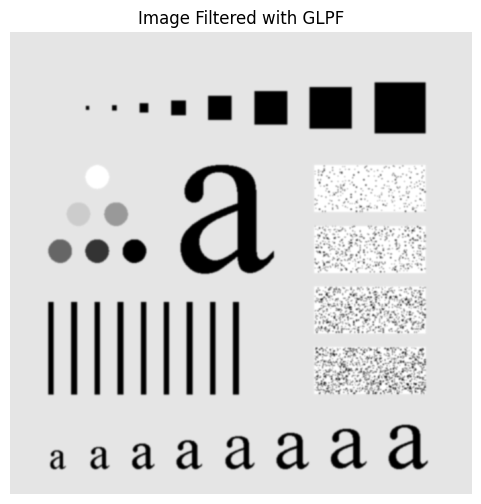

In [10]:
# Filter the image in the frequency domain using the GLPF
glpf_filtered_dft = dft_centered * glpf  # element-wise multiplication.

# Compute the inverse DFT of the GLPF filtered image
glpf_filtered_image = np.fft.ifft2(glpf_filtered_dft).real

# Compensate for the centered DFT
glpf_filtered_image = np.array([[glpf_filtered_image[x, y] * (-1)**(x + y) for y in range(cols)] for x in range(rows)])

# Display the GLPF filtered image
plt.figure(figsize=(6, 6))
plt.imshow(glpf_filtered_image, cmap='gray')
plt.title("Image Filtered with GLPF")
plt.axis('off')

# Save the image 
save_path = "output/Q2_5.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


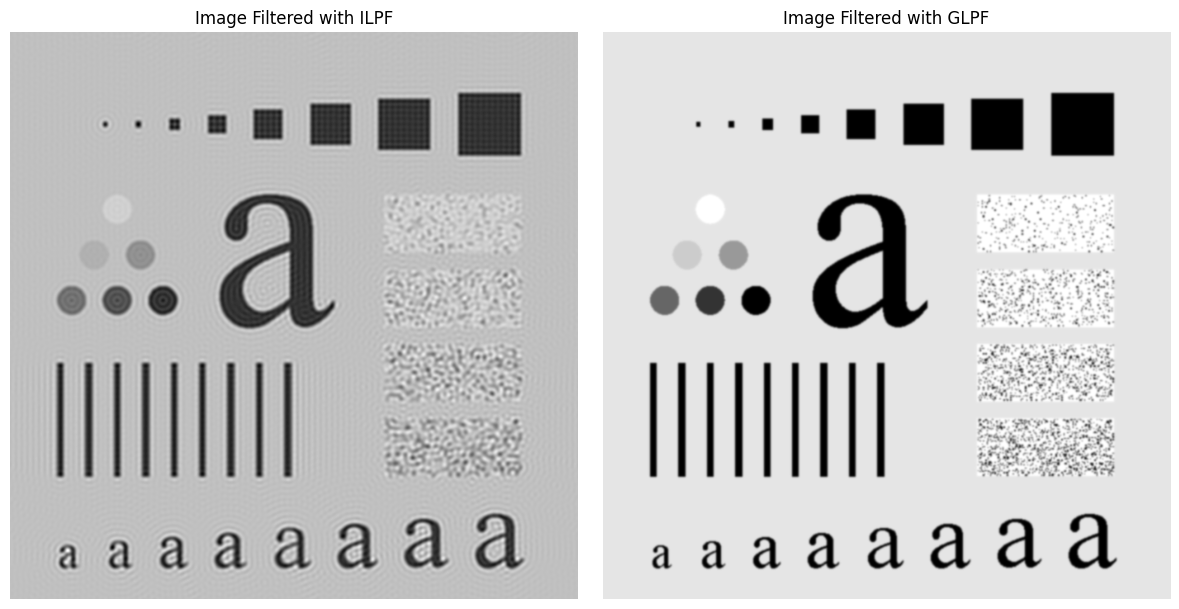

In [11]:
# Display the ILPF and GLPF filtered images side by side for comparison
plt.figure(figsize=(12, 6))

# ILPF filtered image
plt.subplot(1, 2, 1)
plt.imshow(ilpf_filtered_image, cmap='gray')
plt.title("Image Filtered with ILPF")
plt.axis('off')

# GLPF filtered image
plt.subplot(1, 2, 2)
plt.imshow(glpf_filtered_image, cmap='gray')
plt.title("Image Filtered with GLPF")
plt.axis('off')

plt.tight_layout()

# Save the image 
save_path = "output/Q2_6.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()


 # **(3)Image Deblurring**

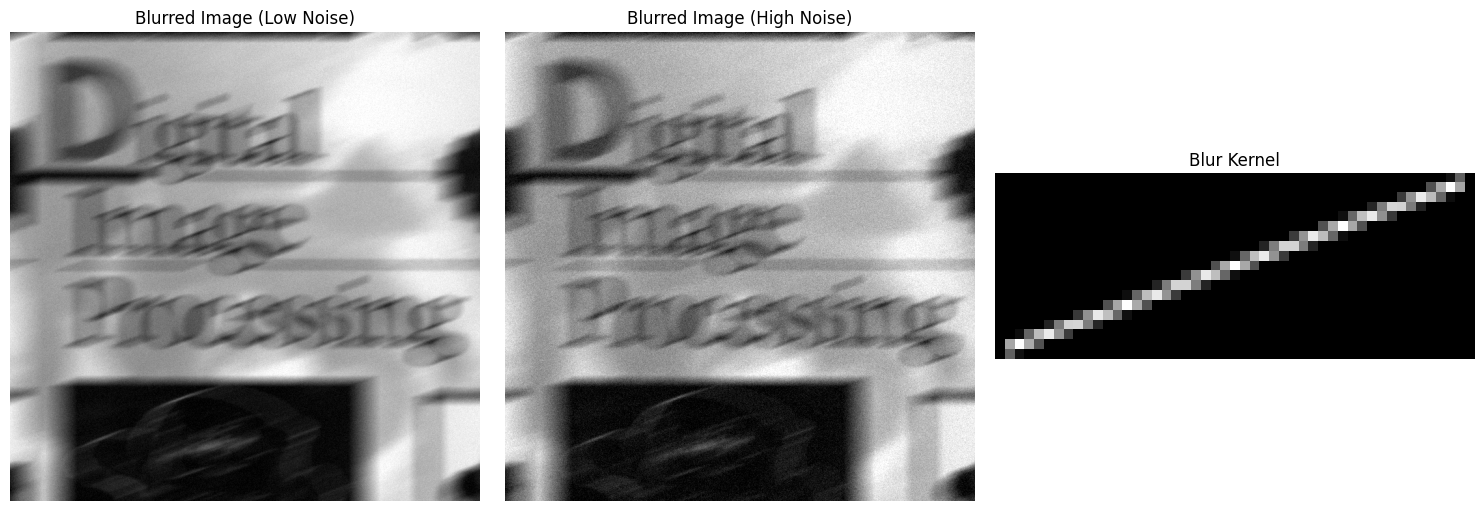

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io, color, img_as_float

# Load the blurred images
blurred_low_noise_img = img_as_float(io.imread("files/Blurred_LowNoise.png", as_gray=True))  # grayscale
blurred_high_noise_img = img_as_float(io.imread("files/Blurred_HighNoise.png", as_gray=True)) # grayscale

# Load the blur kernel
blur_kernel_data = loadmat("files/BlurKernel.mat")
blur_kernel = blur_kernel_data["h"]

# Display the images and kernel
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(blurred_low_noise_img, cmap='gray')
axes[0].set_title("Blurred Image (Low Noise)")
axes[0].axis('off')

axes[1].imshow(blurred_high_noise_img, cmap='gray')
axes[1].set_title("Blurred Image (High Noise)")
axes[1].axis('off')

axes[2].imshow(blur_kernel, cmap='gray')
axes[2].set_title("Blur Kernel")
axes[2].axis('off')

plt.tight_layout()
plt.show()


True


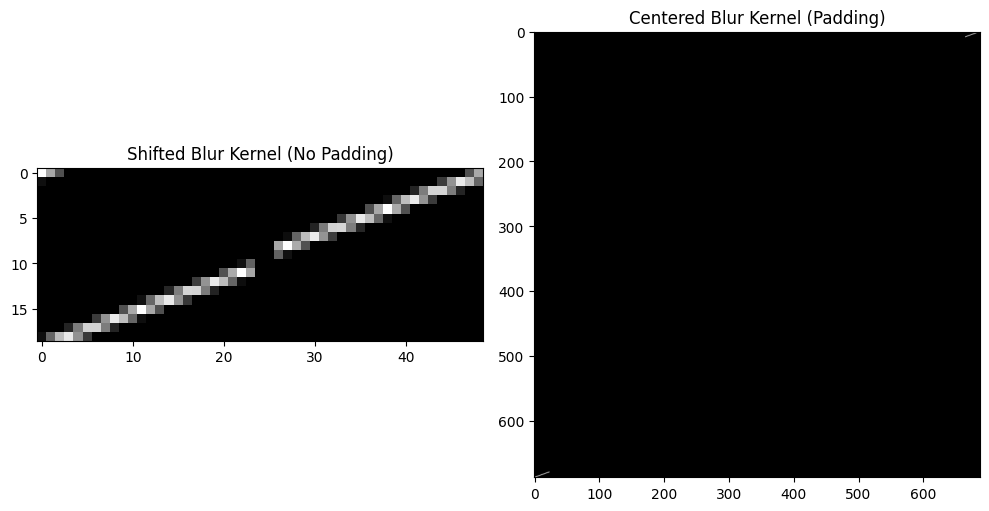

In [13]:
# before computing DFT, shift the filter (centered_kernal) without padding
def shift_kernel(kernel):
    """
    Shifts the kernel's center to the top-left (position (0,0)) without padding.
    
    Parameters:
    - kernel (numpy.ndarray): Input kernel to be shifted.
    
    Returns:
    - shifted (numpy.ndarray): Shifted kernel.
    """
    (m, n) = kernel.shape
    shifted = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            shifted[i, j] = kernel[(i+9) % m, (j+24) % n]
    return shifted

 # before computing DFT, shift the filter (centered_kernal) with padding
def center_kernel(kernel, M, N):
    """
    Shifts the kernel's center to the top-left (position (0,0)) and then pads it to match the given dimensions.
    
    Parameters:
    - kernel (numpy.ndarray): Input kernel to be centered.
    - M (int): Desired height after padding.
    - N (int): Desired width after padding.
    
    Returns:
    - centered (numpy.ndarray): Centered and padded kernel.
    """
    centered = np.zeros((M, N))
    (m, n) = kernel.shape
    for i in range(m):
        for j in range(n):
            centered[(i+M-9) % M, (j+N-24) % N] = kernel[i, j]
    return centered


# Center the blur kernel for both images
M_low, N_low = blurred_low_noise_img.shape
M_high, N_high = blurred_high_noise_img.shape

# Check if the dimensions of the blurred images are the same
are_dimensions_equal = (M_low == M_high) and (N_low == N_high)
print(are_dimensions_equal)

# If the dimensions are equal, update M and N accordingly
if are_dimensions_equal:
    M = M_low
    N = N_low

# Shift the kernel without padding
shifted_kernel = shift_kernel(blur_kernel)
# Center the blur kernel using the dimensions M and N
centered_kernel = center_kernel(blur_kernel, M, N)

# centered_kernel_low = center_kernel(blur_kernel, M_low, N_low)
# centered_kernel_high = center_kernel(blur_kernel, M_high, N_high)


# Display the kernels
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(shifted_kernel, cmap='gray')
axes[0].set_title("Shifted Blur Kernel (No Padding)")
#axes[0].axis('off')

axes[1].imshow(centered_kernel, cmap='gray')
axes[1].set_title("Centered Blur Kernel (Padding)")
#axes[1].axis('off')

plt.tight_layout()

# Save the image 
save_path = "output/Q3_1.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()


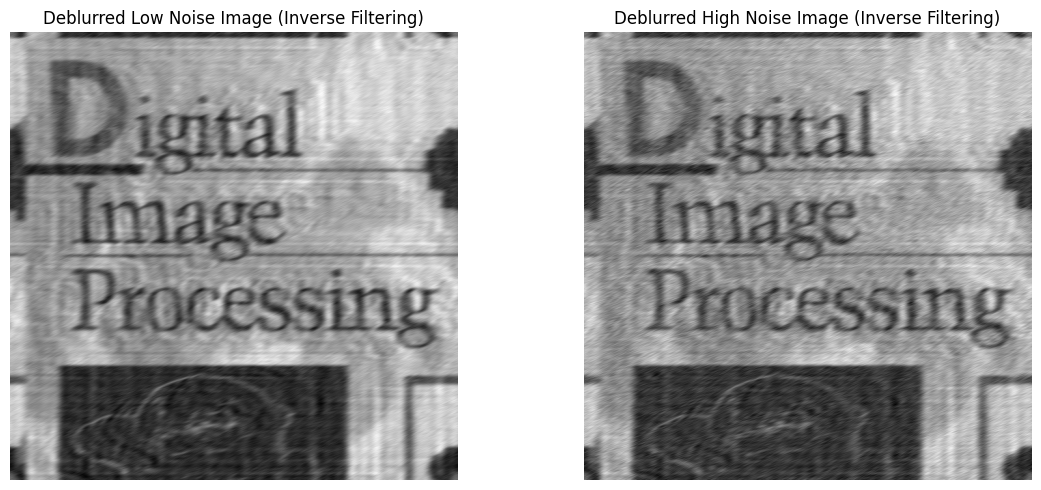

In [14]:
def inverse_filtering(blurred_img, centered_kernel, threshold=0.1):
    """
    Deblur an image using the inverse filtering method in the frequency domain.
    
    Parameters:
    - blurred_img (numpy.ndarray): The input blurred image to be deblurred.
    - centered_kernel (numpy.ndarray): The centered kernel used for blurring.
    - threshold (float, optional): Threshold value below which the Fourier transform of the kernel values 
                                   are set to zero to avoid noise amplification. Default is 0.1.
    
    Returns:
    - deblurred_img (numpy.ndarray): The deblurred image.
    """
    
    # Compute the FFT of the blurred image and the kernel
    blurred_img_fft = fft2(blurred_img)
    kernel_fft = fft2(centered_kernel, shape=blurred_img.shape)
    
    # Create inverse filter: set values to 0 where below threshold
    inverse_filter = np.where(np.abs(kernel_fft) > threshold, 1 / kernel_fft, 0)
    
    # Apply the filter in the frequency domain
    deblurred_fft = blurred_img_fft * inverse_filter
    
    # Compute the inverse FFT to get the deblurred image
    deblurred_img = np.real(ifft2(deblurred_fft))
    
    return deblurred_img

# Apply inverse filtering to the blurred images
deblurred_low_noise = inverse_filtering(blurred_low_noise_img, centered_kernel)  # before computing DFT, shift the filter (centered_kernal)
deblurred_high_noise = inverse_filtering(blurred_high_noise_img, centered_kernel)


# # Apply inverse filtering to the blurred images
# deblurred_low_noise = inverse_filtering(blurred_low_noise_img, centered_kernel_low)
# deblurred_high_noise = inverse_filtering(blurred_high_noise_img, centered_kernel_high)

# Display the deblurred images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(deblurred_low_noise, cmap='gray')
axes[0].set_title("Deblurred Low Noise Image (Inverse Filtering)")
axes[0].axis('off')

axes[1].imshow(deblurred_high_noise, cmap='gray')
axes[1].set_title("Deblurred High Noise Image (Inverse Filtering)")
axes[1].axis('off')

plt.tight_layout()

# Save the image 
save_path = "output/Q3_2.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()



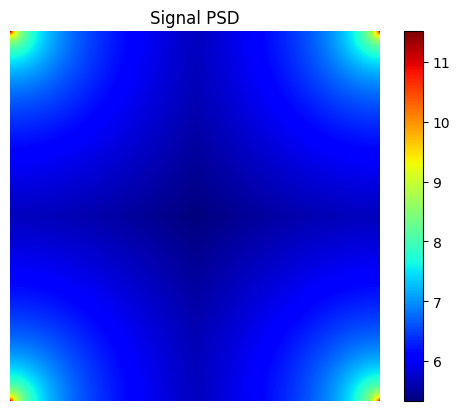

In [15]:
# does not take into account the noise variance - sigma(σ^2) present in the image
def compute_signal_PSD(M, N, k):
    """
    Compute the power spectral density (PSD) for the signal using the given power law.
    
    Parameters:
    - M (int): Height of the desired PSD.
    - N (int): Width of the desired PSD.
    - k (float): Constant for the power law.
    
    Returns:
    - S_f (numpy.ndarray): The computed power spectral density.
    """
    
    # Define the frequency coordinates u and v
    u = np.array([i if i <= M // 2 else i - M for i in range(M)])
    v = np.array([i if i <= N // 2 else i - N for i in range(N)])
    
    # Create a 2D grid of these coordinates
    V, U = np.meshgrid(v, u)
    
    # Compute the signal PSD based on the given power law
    with np.errstate(divide='ignore'):  # Handle division by zero
        S_f = k / np.sqrt(U**2 + V**2)
    S_f[0, 0] = k  # Set the DC component
    
    return S_f


# Compute the signal PSD for both images
# Compute the signal PSD for the image (since both images have the same dimensions, we can use M = M_low and N = N_low)

k = 10**5
# signal_PSD_low = compute_signal_PSD(M_low, N_low, k)
# signal_PSD_high = compute_signal_PSD(M_high, N_high, k)
signal_PSD = compute_signal_PSD(M, N, k)



# Display the signal PSD
plt.imshow(np.log1p(signal_PSD), cmap='jet')
plt.title("Signal PSD")
plt.axis('off')
plt.colorbar()

# Save the image 
save_path = "output/Q3_3.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')

plt.show()


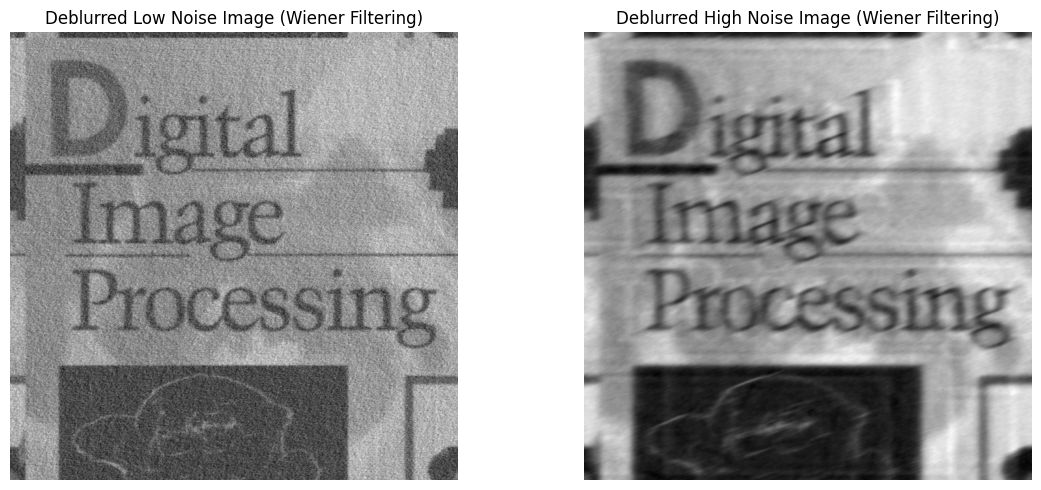

In [16]:
def wiener_filtering(blurred_img, centered_kernel, signal_PSD, noise_variance):
    """
    Deblur an image using Wiener filtering.
    """
    # Compute the FFT of the blurred image and the kernel
    blurred_img_fft = fft2(blurred_img)
    kernel_fft = fft2(centered_kernel, shape=blurred_img.shape)
    
    # Compute the Wiener filter in the frequency domain
    wiener_filter = (np.conj(kernel_fft) * signal_PSD) / (np.abs(kernel_fft)**2 * signal_PSD + noise_variance)
    
    # Apply the filter in the frequency domain
    deblurred_fft = blurred_img_fft * wiener_filter
    
    # Compute the inverse FFT to get the deblurred image
    deblurred_img = np.real(ifft2(deblurred_fft))
    
    return deblurred_img

# Noise variances for the blurred images
noise_variance_low = 1**2
noise_variance_high = 10**2

# Apply Wiener filtering to the blurred images
# wiener_deblurred_low_noise = wiener_filtering(blurred_low_noise_img, centered_kernel_low, signal_PSD_low, noise_variance_low)
# wiener_deblurred_high_noise = wiener_filtering(blurred_high_noise_img, centered_kernel_high, signal_PSD_high, noise_variance_high)
wiener_deblurred_low_noise = wiener_filtering(blurred_low_noise_img, centered_kernel, signal_PSD, noise_variance_low)  # before computing DFT, shift the filter (centered_kernal)
wiener_deblurred_high_noise = wiener_filtering(blurred_high_noise_img, centered_kernel, signal_PSD, noise_variance_high)



# Display the deblurred images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(wiener_deblurred_low_noise, cmap='gray')
axes[0].set_title("Deblurred Low Noise Image (Wiener Filtering)")
axes[0].axis('off')

axes[1].imshow(wiener_deblurred_high_noise, cmap='gray')
axes[1].set_title("Deblurred High Noise Image (Wiener Filtering)")
axes[1].axis('off')

plt.tight_layout()


# Save the image 
save_path = "output/Q3_4.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi='figure')
plt.show()
